# Building Basic predictive models over the NYC Taxi Trip Dataset

In [1]:
#Importing Required libraries.

import numpy as np
import pandas as pd
from datetime import timedelta
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [22]:
#Reading data with pandas and giving vaiable name tt
tt = pd.read_csv('nyc_taxi_trip_duration.csv')
tt.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,400
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,1100
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,1635
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,1141
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,848


In [23]:
#Rows and columns
tt.shape

(729322, 11)

In [24]:
tt.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration'],
      dtype='object')

In [25]:
tt['trip_duration_hour'] = tt['trip_duration'].apply(lambda x: x/3600)

In [26]:
#Checking missing values. 
np.sum(pd.isnull(tt))

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
trip_duration_hour    0
dtype: int64

# Regression Model

In [27]:
tt.dtypes

id                     object
vendor_id               int64
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration           int64
trip_duration_hour    float64
dtype: object

In [28]:
#seperate features and target
features = tt.drop(["id","vendor_id","trip_duration_hour", "pickup_datetime","dropoff_datetime"],axis = 1)
target = tt["trip_duration_hour"]

In [30]:
#Data Cleaning
df = pd.concat([tt, pd.get_dummies(tt[['passenger_count']].astype('str'))], axis=1)
try:
    df.drop(['id','vendor_id','trip_duration_hour','pickup_datetime','dropoff_datetime','store_and_fwd_flag','passenger_count'], axis=1, inplace=True)
except KeyError:
    pass

df.head()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,passenger_count_0,passenger_count_1,passenger_count_2,passenger_count_3,passenger_count_4,passenger_count_5,passenger_count_6,passenger_count_7,passenger_count_9
0,-73.953918,40.778873,-73.963875,40.771164,400,0,1,0,0,0,0,0,0,0
1,-73.988312,40.731743,-73.994751,40.694931,1100,0,0,1,0,0,0,0,0,0
2,-73.997314,40.721458,-73.948029,40.774918,1635,0,0,1,0,0,0,0,0,0
3,-73.961670,40.759720,-73.956779,40.780628,1141,0,0,0,0,0,0,1,0,0
4,-74.017120,40.708469,-73.988182,40.740631,848,0,1,0,0,0,0,0,0,0


In [31]:
df.shape

(729322, 14)

In [42]:
#seperate features and target
x = df
y = tt["trip_duration_hour"]
x.shape,y.shape

((729322, 14), (729322,))

In [43]:
#Splitting data into Train and test sets
# Importing the train test split function
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(x,y, random_state = 56)

Implementing linear regression

In [58]:
#importing Linear Regression and metric mean square error
from sklearn.linear_model import LinearRegression as LR
from sklearn.metrics import mean_absolute_error as mae
from math import sqrt

In [59]:
# Creating instance of Linear Regresssion
lr = LR()

# Fitting the model
lr.fit(train_x, train_y)

LinearRegression()

In [60]:
#predicting the train dataset and finding the RMSE
train_predict = lr.predict(train_x)
k = sqrt(mae(train_predict,train_y))
print("training mean_absolute_error ",k)

training mean_absolute_error  2.453798465116841e-08


In [61]:
#predicting the test values and finding the RMSE
test_predict = lr.predict(test_x)
k = sqrt(mae(test_predict,test_y))
print("testing mean_absolute_error ",k)

testing mean_absolute_error  2.442279470963418e-08


Parameters of Linear Regression

In [62]:
lr.coef_

array([ 3.97917031e-16,  2.13156316e-14,  6.24538420e-15,  3.07293112e-15,
        2.77777778e-04,  1.10170870e-15, -2.93581599e-16, -1.68512130e-16,
       -1.47990335e-16, -1.50832594e-16, -1.93140085e-16, -1.47651964e-16,
        0.00000000e+00,  0.00000000e+00])

Plotting the Coefficient

Text(0.5, 1.0, 'Coefficient Plots')

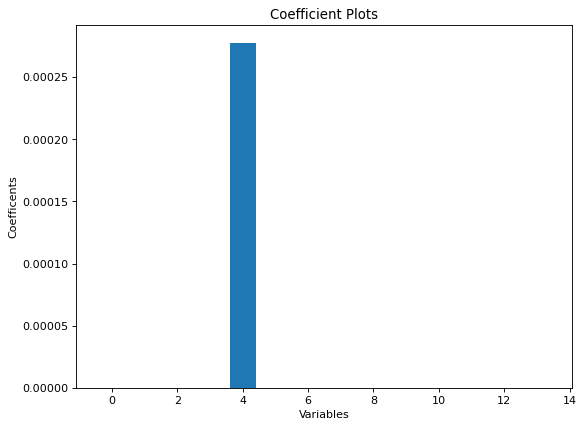

In [85]:
plt.figure(figsize=(8,6),dpi=80,facecolor="w",edgecolor="b")
x = range(len(train_x.columns))
y = lr.coef_
plt.bar(x,y)
plt.xlabel("Variables")
plt.ylabel("Coefficents")
plt.title("Coefficient Plots")

In [86]:
#calculate the residuals 
residuals = pd.DataFrame({
    "fitted_values":test_y,
    "predicted_values":test_predict
})
residuals["residuals"]=residuals["fitted_values"]-residuals["predicted_values"]
residuals.head()

,fitted_values,predicted_values,residuals
14908,0.668333,0.668333,-9.992007e-16
87154,0.404722,0.404722,-7.216450e-16
666581,0.045278,0.045278,-1.249001e-16
543467,0.600000,0.600000,-5.551115e-16
105193,0.111667,0.111667,-4.163336e-16


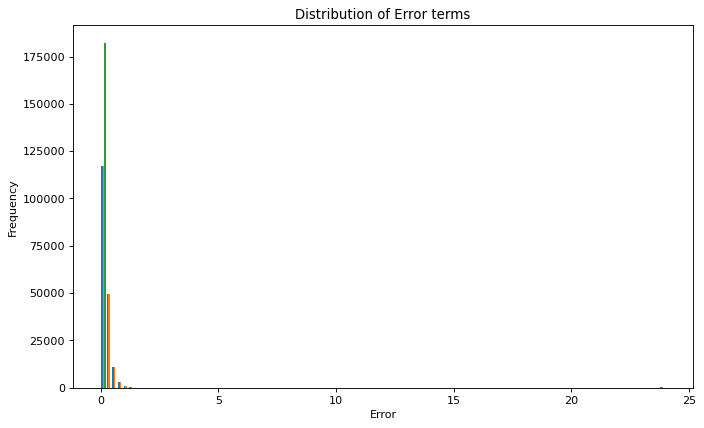

In [87]:
plt.figure(figsize=(10,6),dpi=80,facecolor="w",edgecolor="b")
plt.hist(residuals,bins=100)
plt.xlabel("Error")
plt.ylabel("Frequency")
plt.title("Distribution of Error terms")
plt.show()

In [88]:
linear_train_score = lr.score(train_x,train_y)
linear_train_score

1.0

In [84]:

linear_test_score = lr.score(test_x,test_y)
linear_test_score

1.0